<a href="https://colab.research.google.com/github/darshandahal/MachineLearning/blob/main/Intro_to_Linear_Regression600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -oq /content/archive.zip

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Salary Data.csv')
df.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


It seems like data has missing values because we have 375 entries and 373 not null values in each column.

In [ ]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

2 rows missing in every column

<Axes: >

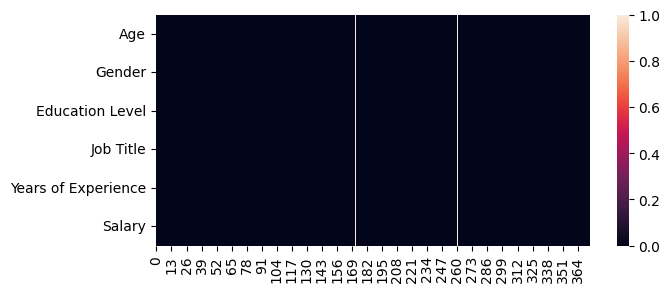

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))
sns.heatmap(df.isna().transpose())

# How to handle missing values:

* Delete
    * If the target is missing we drop the row.
    * if a column contains more than 70% data missing we drop the column

* Imputation: fill in missing values
    * Mean: If data is in normal distribution and with no outliers we fill missing data using mean
    * Median: If data is in normal distribution and with outliers we fill missing data using median
    * mode: mode is used to fill in missing values for categorical data.
    * Interpolation:

* Algorithms to fill in missing data
    * Linear Regression
    * KNN
    * Clustering
    * MICE
    * Iterative Imputer


* Use other EDA(Exploratory data analysis) technique to fill in missing data.

In our data we have row in a salary missing so we drop the row.

In [ ]:
df.dropna(inplace=True) # inplace = True le dataframe update garxa, dropna() le row drop garxa

In [ ]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# Assumptions of Linear Regression

There are four assumptions associated with a linear regression model:
* Linearity: The relationship between X and the mean of Y is linear.
* Homoscedasticity: The variance of residual is the same for any value of X.
* Independence: Observations are independent of each other.
* Normality: For any fixed value of X, Y is normally distributed.


In [ ]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


<ipython-input-8-141d3fd96352>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

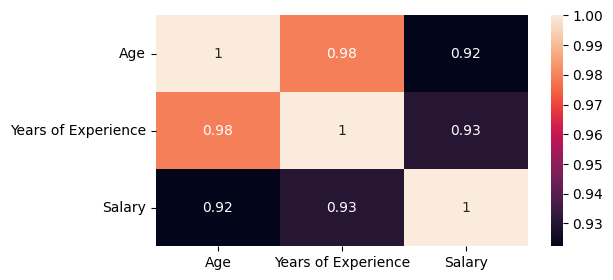

In [ ]:
plt.figure(figsize = (6,3))
sns.heatmap(df.corr(), annot = True)

# Independent and dependent variable
* Independent variable : Years of Experience, Age
* Dependent variable: salary

salary is continuous data so should fit linear regression line.

Since age and salary are +ve ly correlated we can use age to predict salary. Additionally we can also use Years of experience to predict salary because  the correlation value is 0.93.

However, we cannot use both age and years of experience as independent variable because age and years of experience has correlation value 0.98. It is a problem of multi-colinearity.

We will use Years of Experience to predict Salary. This is called Feature selection using correlation value.

In [ ]:
X = df[['Years of Experience']]
y = df.Salary

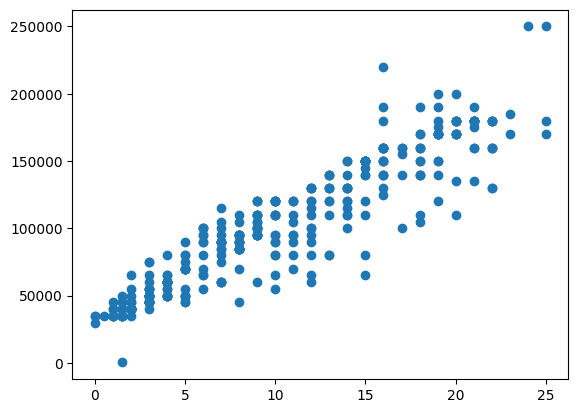

In [ ]:
# plot the relationship between X and y
plt.scatter(x=X, y = y)

Training and predictcting ML model on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

In [ ]:
len(X)

373

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [ ]:
X_train.shape, y_train.shape

((261, 1), (261,))

In [ ]:
X_test.shape, y_test.shape

((112, 1), (112,))

In [ ]:
X_train

,Years of Experience
276,17.0
11,18.0
147,4.0
333,4.0
205,17.0
...,...
308,12.0
165,1.5
7,4.0
220,19.0


In [ ]:
y_train

276    160000.0
11     140000.0
147     60000.0
333     60000.0
205    160000.0
         ...   
308    120000.0
165     35000.0
7       80000.0
220    170000.0
328    110000.0
Name: Salary, Length: 261, dtype: float64

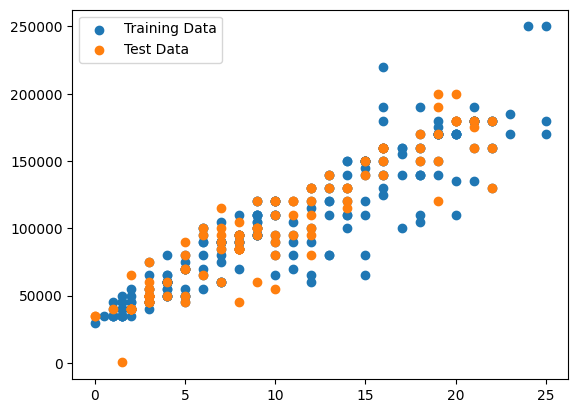

In [ ]:
plt.scatter(X_train, y_train, label = 'Training Data')
plt.scatter(X_test, y_test, label = 'Test Data')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)

In [ ]:
MSE # Evaluation metric

275485639.5245797

In [ ]:
MAE # evaluation metric

12406.310708051982

In [ ]:
# what is the value of m and c?

m = model.coef_
c = model.intercept_

In [ ]:
m

array([6792.88378088])

In [ ]:
c

31960.484465728354

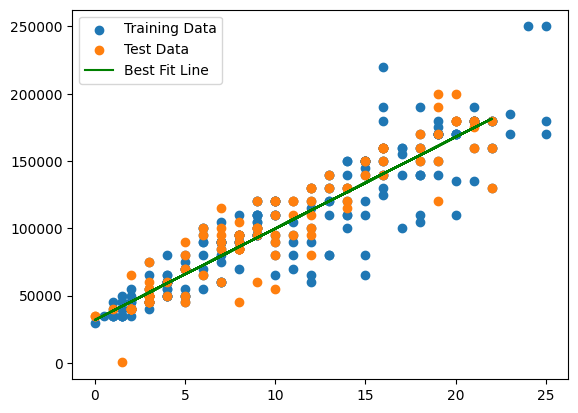

In [ ]:
plt.scatter(X_train, y_train, label = 'Training Data')
plt.scatter(X_test, y_test, label = 'Test Data')
plt.plot(X_test, y_pred, label = 'Best Fit Line', color = 'green')
plt.legend()
plt.show()

In [ ]:
years_of_experience = 5
salary = model.predict([[years_of_experience]]) # 2D
salary

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65924.90337011])

In [ ]:
years_of_experience = 8
model.predict([[years_of_experience]]) # 2D

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86303.55471274])

# Encoding Categorical variable

In [ ]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


# One hot encoding

In [ ]:
cols = ['Gender', 'Education Level' ,'Job Title']

In [ ]:
pd.get_dummies(columns = cols, data = df)

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Job Title_Account Manager,Job Title_Accountant,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,65000.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,60000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,200000.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,35.0,8.0,85000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,43.0,19.0,170000.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,29.0,2.0,40000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,34.0,7.0,90000.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = pd.get_dummies(columns = cols, data = df, drop_first=True)

In [ ]:
data.head()

,Age,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,65000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,60000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,200000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.drop(columns = ['Age'], inplace = True) # why correlated with years of experience

In [ ]:
data.head()

,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,5.0,90000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,65000.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.0,150000.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,60000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.0,200000.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data.drop('Salary', axis = 1)
y = data.Salary

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print(f"MSE = {MSE}")
print(f"MAE = {MAE}")

MSE = 2.516636455467676e+29
MAE = 130426861791644.27


In [ ]:
X_train

,Years of Experience,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,Job Title_CEO,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
276,17.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,18.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,4.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333,4.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,17.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,12.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,1.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,19.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
